## COMP3670/6670 Programming Assignment 2 - Clustering, Linear Regression and Gradient Descent
---

**Enter Your Student ID: ** u6668002

**Your Name:** Thomas Krnc
    
**Deadline:** 23:59pm, 19 September, 2021

**Submit:** Write your answers in this file, and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'uXXXXXXX.ipynb'. Note: you don't need to submit the .png or .npy files. 

**Enter Discussion Partner IDs Below:**
You could add more IDs with the same markdown format above.

**Programming Section**:
- 1: 30%
- 2: 40%
- 3: 30%

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(1)


## Task1: Clustering
-----------
These programming exercises will focus on K-means clustering. 

If you're unsure of how k-means works, read this very helpful and freely available online breakdown from Stanford's CS221 course; https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

This assignment requires you to loosely interpret how k-means is a specific case of a more general algorithm named Expectation Maximisation. This is explained toward the end of the above article.

First, lets loading the dataset.

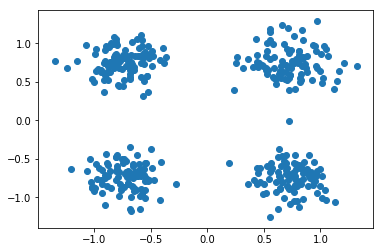

In [195]:
X = np.load("./data_clustering.npy")
plt.scatter(X[:,0], X[:,1])
plt.show()

K-means is a special, simple case of the Expectation Maximisation (EM) algorithm.

This simplified EM (k-means), is divided into two steps.

The **E-Step**, where for every sample in your dataset you find which "centroid" that datapoint is closest to that sample, and record that information.

The **M-Step**, where you move each "centroid" to the center of the samples which were found to be closest to it in the **E-Step**.

Each *centroid* is simply an estimated mean of a cluster. If you have $1$ centroid, then this centroid will become the mean of all your data.

Centroids are initially random values, and the k-means algorithm attempts to modify them so that each one represents the center of a cluster.

We have implemented a centroids initialization function.

In [196]:
def initialise_parameters(m, X):
    C = X[np.random.choice(X.shape[0], m)]
    return C

C = initialise_parameters(4, X)
print(C)

[[ 0.55638768  1.19083041]
 [ 0.99468733 -0.63105385]
 [-0.80861347 -0.47487527]
 [ 0.83443335  0.7038998 ]]


Now let's implement K-Means algorithm.

---
   **TASK 1.1:** Create a function $E\_step(C, X) = L$, where $L$ is a matrix of the same dimension of the dataset $X$.
   
   This function is is the **E-Step** (or "assignment step") mentioned earlier.

---

**HINT:** 
- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
- https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm
- Each row of $L$ is a centroid taken from $C$.

In [170]:
def E_step(C, X):
    # C is centroids
    # X is data points
    L = np.zeros((X.shape[0],X.shape[1]))

    #L is a list which contains mappings from data points in X to the closest centroid in C
    #L[i] corresponds to which centroid X[i] is closest to in C 
    #L[i] = argmin_j||X[i] - C[j]||
    
    #go through each point in X
    for i in range(X.shape[0]):
        
        #assume the first is the closest
        minIndex = 0
        minDistance = distance(C[0], X[i])
        
        #check to see if any of the other centroids are closer, if they are, save the index and update minindex
        for j in range(1, C.shape[0]):
            if (distance(C[j], X[i]) < minDistance):
                minDistance = distance(C[j], X[i])
                minIndex = j
                
        #save which centroid is closest to X[i] in L[i]
        L[i] = C[minIndex]    
    return L

#calc distance based on L2 norm ||x1-x2||_2 =  sqrt(sum((x1_i - x2_i)^2))
def distance(x1,x2):
    return math.sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)
    
L = E_step(C, X)

**TASK 1.2:** Create a function $M\_step(C, X, L) = C$ which returns $C$ modified so that each centroid in $C$ is placed in the middle of the samples assigned to it. This is the **M-Step**.

In other words, make each centroid in $C$ the average of all the samples which were found to be closest to it during the **E-step**. This is also called the "update step" for K-means.

---

**HINT:** https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html

In [171]:
def M_step(C, X, L):
    #C is the old centroids
    #X is data points
    #L is which centroid the data point belongs to
    
    #newC is the new calculated centroid
    #newCC is number of points in a centroid
    newC = np.zeros((C.shape[0],C.shape[1]))
    newCC = np.zeros((C.shape[0]))
    
    
    for i in range(X.shape[0]):
        #find which cluster L[i] belongs to; store as an index
        centroidIndex = C.tolist().index(L[i].tolist())
        
        #update average calculations for new centroid
        newC[centroidIndex] = newC[centroidIndex] + X[i]
        newCC[centroidIndex] = newCC[centroidIndex] + 1
        
    #divide each centroid by number of points in cluster to obtain average
    for i in range(C.shape[0]):
        newC[i] = newC[i]/newCC[i]
    return newC
   

print('Before:')
print(C)
print('\nAfter:')
new_C = M_step(C, X, L)
print(new_C)

Before:
[[ 0.97110334  0.67568989]
 [ 0.9430467  -0.53732245]
 [ 0.53034597  0.99940959]
 [ 1.010517    0.48315647]]

After:
[[ 0.83466762  0.72505853]
 [ 0.00773725 -0.7413776 ]
 [-0.36991891  0.7851856 ]
 [ 0.8752831   0.48540298]]


**TASK 1.3:** Implement $kmeans(X, m, i) = C, L$ which takes a dataset $X$ (of any dimension) and a scalar value $m$, and uses the previous 3 functions you wrote to:
- generate $m$ centroids.
- iterate between the E and M steps $i$ times (ie, it iterates $i$ times) to classify the $m$ clusters.

...and then returns:
- $C$, the centers of the $m$ clusters after $i$ iterations.
- $L$, the labels (centroid values) assigned to each sample in the dataset after $i$ iterations.
---
**HINT:** Using initialise_parameters to initial centroid

Initial Parameters:
[[ 0.97110334  0.67568989]
 [ 0.9430467  -0.53732245]
 [ 0.53034597  0.99940959]
 [ 1.010517    0.48315647]]

Final Parameters:
[[-0.73312486 -0.73655558]
 [-0.74965351  0.7531092 ]
 [ 0.72539561  0.75302836]
 [ 0.74859936 -0.74619961]]


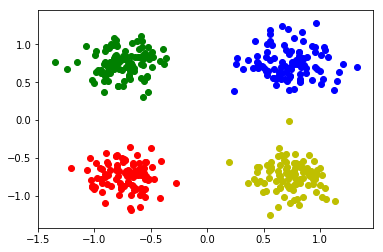

In [172]:
def kmeans(X, m, i):
    # YOUR CODE HERE
    C = initialise_parameters(m, X)
    
    for j in range(i):
        L = E_step(C, X)
        C = M_step(C, X, L)
    return C, L


#CODE TO DISPLAY YOUR RESULTS. DO NOT MODIFY.
C_final, L_final = kmeans(X, 4, 10)
print('Initial Parameters:')
print(C)
print('\nFinal Parameters:')
print(C_final)

def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)

colours = ['r', 'g', 'b', 'y']
for i in range(4):
    cluster = allocator(X, L_final, C_final[i, :])
    plt.scatter(cluster[:,0], cluster[:,1], c=colours[i])
plt.show()

Your answer should like this, maybe with different colors:
![image](./cluster.png)

---
**TASK 1.4:** Explain how do you find the number of centroids

---
**Answer:** The number of centroids is a hyperparameter, and therefore we cant use the same standard methods that we would use to tune paramters to find the number of centroids. We would need to use empirical methods must be used to find the number of centroids, such as inspecting the data before clustering, or training the model with several different cluster sizes and selecting the best result.

## Task 2: Linear Regression and Gradient Descent
---

For exercise 2, we're going to implement multiple target **batch** linear regression with mean squared loss,

$$\mathcal{L} = \frac{1}{2 m} \sum_{i = 0}^{m} \mid \mid x_i\theta - y_i \mid \mid^2$$.

For the following questions:
- $x \in \mathbb{R}^{m}$ is the vector directly representing input features from the provided dataset. Each row of $x$ is a single training example.
- $X \in \mathbb{R}^{m \times n}$ is the constructed feature matrix (e.g. polynomial features) used for learning. Each row of $X$ is a single training example.
- $\theta$ is our parameters. In the linear regression you've seen thus far, this is a vector. However, as we're doing multiple target linear regression, $\theta$ will be a matrix.
- $y \in \mathbb{R}^{m}$ is a matrix of the target values we're trying to estimate for each row of $X$. Each row $i$ of $X$ corresponds to row $i$ of $Y$.
- $m$ is the number of training examples.
- $n$ is the dimensionality of one training example.

Typically when people think of linear regression, they think of a mapping from $\mathbb{R}^n \rightarrow \mathbb{R}$, where they're trying to predict a single scalar value.

---
First, we load the data.

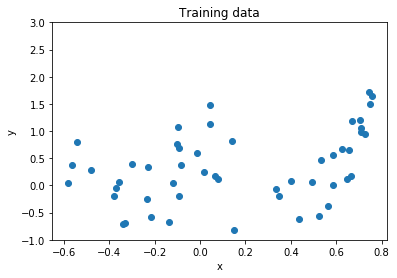

In [173]:
x_train, x_val, y_train, y_val = np.load("./data_regression.npy")
plt.plot(x_train,y_train,'o') ## YOUR CODE HERE
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training data")
plt.ylim([-1,3])
plt.show()


It is obvious that it is not a good idea to perform linear regression directly on the input feature `x`. We need to add polynomial features. Lets construct an appropriate feature vector.

---
**Task 2.1**:  Complete the `get_polynomial_features` function with the following specifications.
* Input1: an array `x` of shape $(m,1)$.
* Input2: `degree` of the polynomial (integer greater than or equal to one).
* Output: matrix of shape $(m,degree+1)$ consisting of horizontally concatenated polynomial terms.
* Output: the first column of output matrix should be all ones.
---

In [198]:
def get_polynomial_features(x, degree=5):
    #fill m, degree + 1 matrix with 1's
    X = np.ones([x.shape[0], degree + 1])
     
    #fill X column wise, mapping each value in the column to the same power (different power for each column)
    for i in range(1, degree + 1):
        X[:,i] = list(map(lambda n: n**i, x))
    return X

# get polynomial features
X_train = get_polynomial_features(x_train,degree=5)

Let us implement gradient descent to find the optimal $\theta$.


---
**TASK 2.2:** Write a function $initialise\_parameters(n) = \theta$, where $\theta$ is the parameters we will use for linear regression $X\theta = Y$ for $X \in \mathbb{R}^{m \times n}, Y \in \mathbb{R}^{m}$.

The values of $\theta$ should be randomly generated. You will be judged on whether the matrix $\theta$ is correctly constructed for this problem.


---

**HINT:** $\theta$ should be an array of length $n$.

In [199]:
def initialise_parameters(n):
    # YOUR CODE HERE
    
    #generate list of n random floats (0-1)
    x = np.random.rand(n)
    return x
    
# initialize theta
theta = initialise_parameters(X_train.shape[1])
print(theta)

[1.14374817e-04 3.02332573e-01 1.46755891e-01 9.23385948e-02
 1.86260211e-01 3.45560727e-01]


---
**TASK 2.3:** Implement a function $ms\_error(X, \theta, y) = err$, which gives the **mean** squared error over all $m$ training examples.

---

In [10]:
def ms_error(X, theta, y):
    #calculate loss
    m = X.shape[0]
    
    loss = 0
    for i in range(m):
        loss = loss + (X[i]@theta - y[i])**2
        
    loss = loss/(2*m)
    return loss

print(ms_error(X_train, theta, y_train))

0.16299042692453086


---

**TASK 2.4:** Implement $grad(X, \theta, Y) = g$, a function that returns the average gradient ($\partial \mathcal{L}/\partial {\theta}$) across all the training examples $x_i \in \mathbb{R}^{1 \times n}$.

---

**HINT:** 
- The gradient should be an array with same length as $\theta$.
- https://www.sharpsightlabs.com/blog/numpy-sum/
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html

In [200]:
def grad(X, theta, Y):
    # YOUR CODE HERE
    #eqiv to 1/m (- y^T X + theta^T X^T) as 1xN and Nx1 vectors represented the same way. saves on computation of transposes
    out = 1/Y.shape[0] * np.transpose(np.transpose(X) @ (- Y + X @ theta))
    
    return out

print(grad(X_train, theta, y_train))

[-0.22023815 -0.05508417 -0.06955933 -0.03997173 -0.03808561 -0.02413471]


---

**TASK 2.5:** Implement $batch\_descent(X, Y, iterations, learning\_rate) = \theta, L$, a function which implements batch gradient descent returning $\theta$ (parameters which estimate $Y$ from $X$), and $L$.

$iterations$ is the number of gradient descent iterations to be performed.

$learning\_rate$ is, of course, the learning rate.

$L$ is a matrix recording the mean squared error at every iteration of gradient descent. It will be an array of length $iterations$.

You should use the functions you completed earlier to complete this. 

---

**HINT:** 
- Remember, the point of gradient descent is to minimise the loss function. 
- It does this by taking "steps". The gradient always points in the steepest direction uphill, so by stepping in the opposite direction of the gradient we move toward the value of $\theta$ that minimises the loss function.

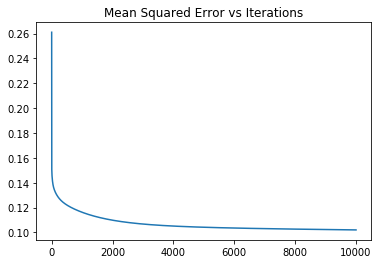

New Theta: 
 [ 0.36175894  0.63382664 -4.53712455 -3.30747686 10.7626202   0.82004813
  4.58326781  1.16366774  1.74745781  0.1394774 ]

Final Mean Squared Error: 
 0.10207133353730422


In [215]:
def batch_descent(X, Y, iterations, learning_rate):
    # YOUR CODE HERE
    theta = initialise_parameters(X.shape[1])
    L = np.zeros(iterations)
    for i in range(iterations):
        L[i] = ms_error(X,theta,Y)
        theta = theta - learning_rate * grad(X, theta, Y)
    return theta, L


#REPORTING CODE. YOU MAY NEED TO MODIFY THE LEARNING RATE OR NUMBER OF ITERATIONS
new_theta, L = batch_descent(X_train, y_train, 10000, 1)
plt.plot(L)
plt.title('Mean Squared Error vs Iterations')
plt.show()
print('New Theta: \n', new_theta)
print('\nFinal Mean Squared Error: \n', ms_error(X_train, new_theta, y_train))

## Task 3: Regularization and Model Selection
---

In task 2, we focussed on using gradient descent to do linear regression with a polynomial of degree 5.

Next, we would try to select a model that gives best performance on the val set.

---
**Task 3.1**:  Visualize the prediction curves for different choice of degree polynomial features, by completing the code below. 

- You can use the closed form solution or gradient descent for computing $\theta$.
- Compute the predictions on val data using `x_val` and computed $\theta$.
---

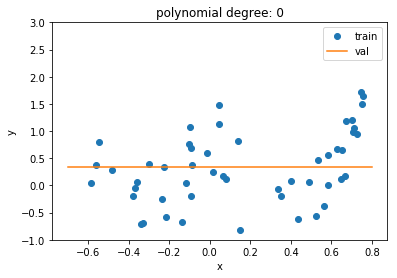

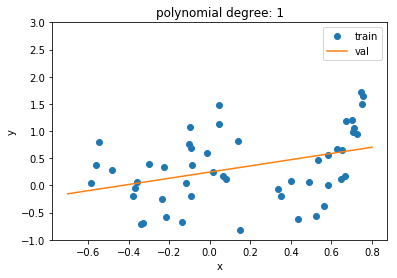

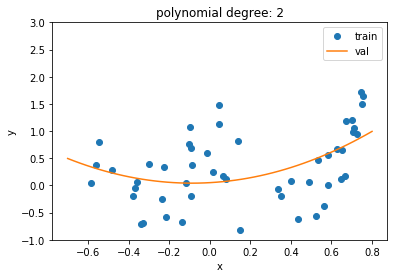

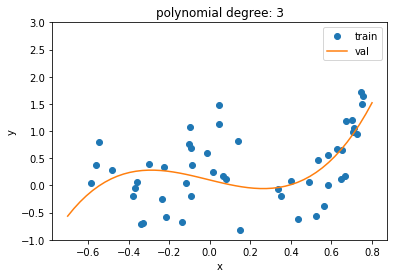

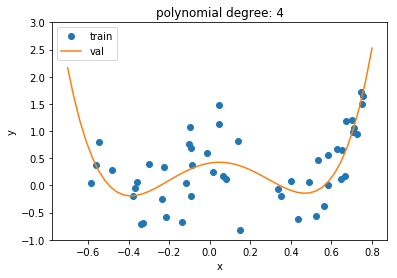

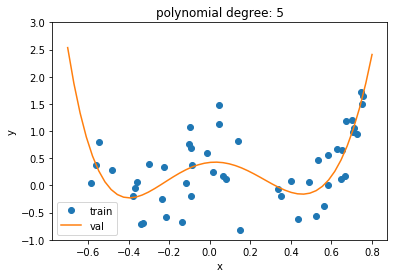

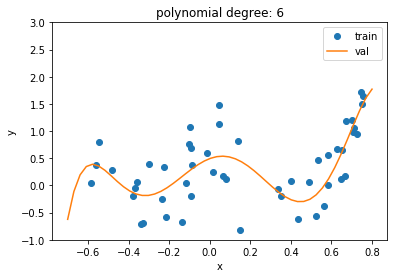

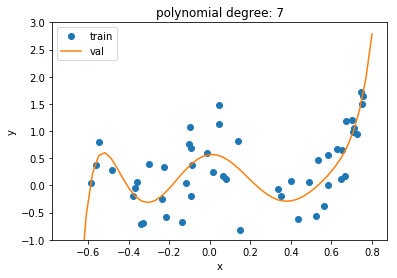

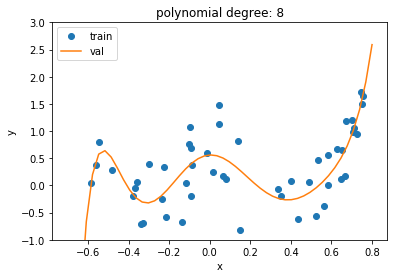

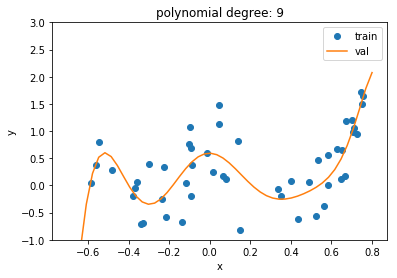

In [212]:
def get_theta(X,y):
    if (is_invertible(np.transpose(X) @ X)):
        return np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ y
    else:       
        return batch_descent(X, y, 10000,1)[0]

def is_invertible(a):
    return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]


def get_prediction(X,theta):
    # YOUR CODE HERE
    return X @ theta


for degree in range(0,10):
    # prepare train/val data
    X_train = get_polynomial_features(x_train, degree=degree)
    x_val = np.linspace(-0.7, 0.8, x_val.shape[0])
    X_val = get_polynomial_features(x_val, degree=degree)
    
    # get theta
    theta = get_theta(X_train,y_train)
    
    # compute predictions on train/val set
    pred_y_train = get_prediction(X_train,theta)
    pred_y_val = get_prediction(X_val,theta)
    
    # plot results
    plt.plot(x_train,y_train,'o',label='train')
    plt.plot(x_val,pred_y_val,label='val')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("polynomial degree: {}".format(degree))
    plt.ylim([-1,3])
    plt.show()

---
**Task 3.2**:  Draw the train, val loss curve for different degree polynomials by completing the following code.

---


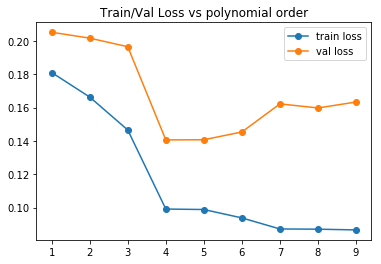

In [211]:
x_train, x_val, y_train, y_val = np.load("./data_regression.npy")
# store train/val loss values
train_loss,val_loss = [],[]

for degree in range(1,10):
    # prepare train/val data
    X_train =  get_polynomial_features(x_train, degree)
    X_val = get_polynomial_features(x_val, degree)

    # get theta
    theta = get_theta(X_train, y_train)
    
    # compute train/val losses
    train_loss.append(ms_error(X_train, theta, y_train))
    val_loss.append(ms_error(X_val, theta, y_val))
        
        
plt.plot(range(1,10),train_loss,'-o',label='train loss')
plt.plot(range(1,10),val_loss,'-o',label='val loss')
plt.xticks(range(1,10))
plt.legend()
plt.title('Train/Val Loss vs polynomial order')
plt.show()


---
**Task 3.3**:  What is the best choice for degree of polynomial features suitable for this problem?

---

**Answer**: A degree of 1-3 underfits the data. A degree greater than or equal to 7 overfits the data. A degree between 4-6 are good choices. However, 4 provides the smallest test error and is therefore the best choice.